In [1]:
# Configuration for the slideshow, DO NOT RUN if you aren't presenting this
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/quickbeam/anaconda3/envs/cogsys-python-intro/etc/jupyter/nbconfig"

cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "start_slideshow_at": "selected",
})

{'start_slideshow_at': 'selected'}

In [2]:
# Run this!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

# Be sure to install snakeviz:
# https://jiffyclub.github.io/snakeviz/
%load_ext snakeviz

from plotter import plot_runtimes

# Why is My Program Slow?

And what can I do about it?

## What Does *Slow* Mean?
Discuss...

### Demo Time!

Count words in the Brown Corpus.

In [6]:
from nltk.corpus import brown
words = [w.lower() for w in brown.words()]

len(words)
len(set(words))

1161192

49815

In [7]:
def word_counts_naive(words_to_count: list):
    counts = {}
    for w in words_to_count:
        if w not in counts:
            counts[w] = words_to_count.count(w)
    return counts

In [34]:
%timeit word_counts_naive(words[:10])

4.59 µs ± 53 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
%timeit word_counts_naive(words[:1000])

10.1 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit word_counts_naive(words[:100000])

41.4 s ± 250 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Pretty Picture

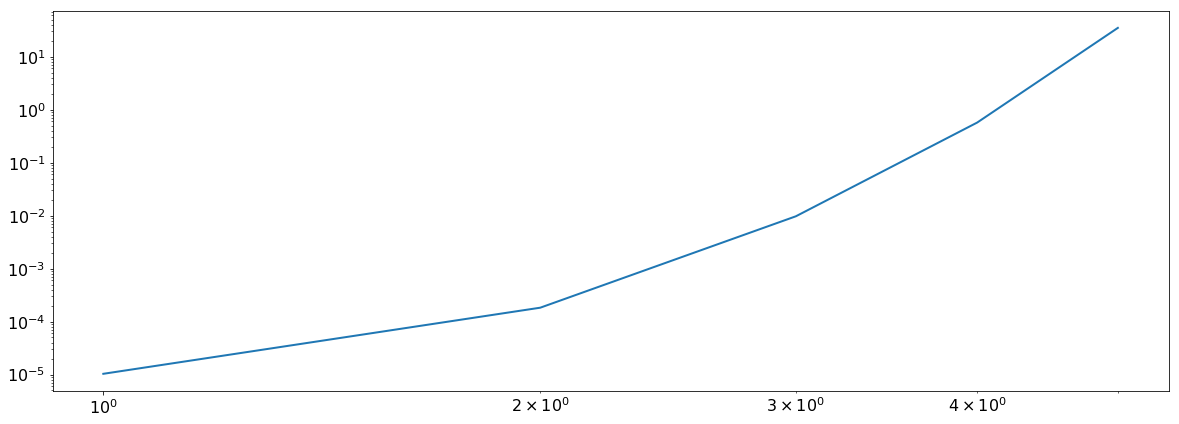

In [10]:
plot_runtimes('naive')

Slower with larger sequences => let's count the steps!

- `n` = size of input sequence, here ~ 1 million
- `m` = number of unique words, here ~ 50K
- `C` = constant

In [4]:
def word_counts_naive(words_to_count: list):
    counts = {}
    for w in words_to_count:
        if w not in counts:
            counts[w] = words_to_count.count(w)
    return counts

### Dictionary Membership Checking

Depends on size of dictionary?

In [10]:
d_small = dict(zip(range(10), range(10)))
d_big = dict(zip(range(1000000), range(1000000)))

In [11]:
%timeit 20 in d_small

48.1 ns ± 2.49 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
%timeit 2000000 in d_big

42.9 ns ± 0.508 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Aside: What About Lists?

In [13]:
l_small = list(range(10))
l_big = list(range(1000000))

In [14]:
%timeit 20 in l_small

232 ns ± 3.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
%timeit 2000000 in l_big

19 ms ± 55.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The difference in timing is almost 100,000, which is **exactly** the ratio of the sizes of the two lists!!

### `list.count()`?

In [4]:
def word_counts_naive(words_to_count: list):
    counts = {}
    for w in words_to_count:
        if w not in counts:
            counts[w] = words_to_count.count(w)  # ???
    return counts

In [17]:
%timeit words[:10].count('the')

461 ns ± 5.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
%timeit words[:1000].count('the')

29.7 µs ± 564 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%timeit words[:100000].count('the')

4.44 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit words.count('the')

36.6 ms ± 774 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## How Many Steps?

In [ ]:
5 in [1, 2, 3]

In [ ]:
[1, 2, 3].index(1)

In [ ]:
[1, 2, 3].index(2)

In [ ]:
[1, 2, 3].index(3)

In [ ]:
1 in {1, 2, 3}

In [ ]:
3 in {1, 2, 3}

In [ ]:
4 in {1, 2, 3}

In [ ]:
def word_counts_naive(words_to_count: list):
    counts = {}                                  # C
    for w in words_to_count:                     # n
        if w not in counts:                      # C
            counts[w] = words_to_count.count(w)  # n
    return counts

`list.count` *actually* gets called only $m$ times

### Total

$$C + n \times C + m \times n$$

**Now imagine $n = 1,000,000$  and $m=50,000$  !!**

We can forget about the constants:
$$ n + m \times n$$

Second term dominates, so we can further simplify:
$$m \times n$$

## Complexity

- care not about *exact number* of steps, but how their number *grows* with the input
- always consider the *worst case scenario*
- nerds use this *notation* for it: $O(n)$, $O(n^2)$, $O(n \times m)$

### Picking an Optimization Target

more tools...

In [9]:
# This will create a 
%snakeviz word_counts_naive(words[:10000])

 
*** Profile stats marshalled to file '/tmp/tmpemdowygg'. 


### Now What?

In [53]:
from collections import Counter

In [54]:
%timeit Counter(words[:10])

8.7 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [55]:
%timeit Counter(words[:1000])

113 µs ± 948 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
%timeit Counter(words[:100000])

18.6 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


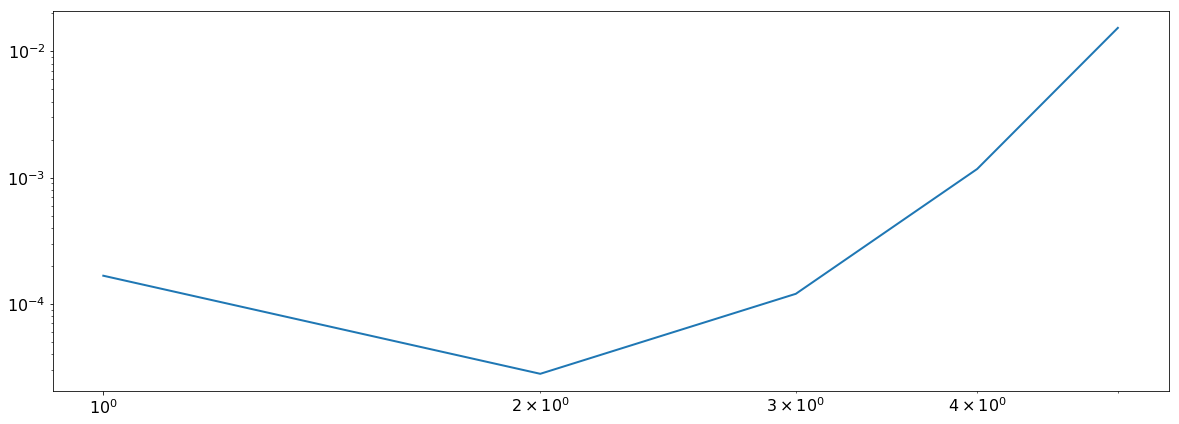

In [4]:
plot_runtimes('counter')

### Side By Side

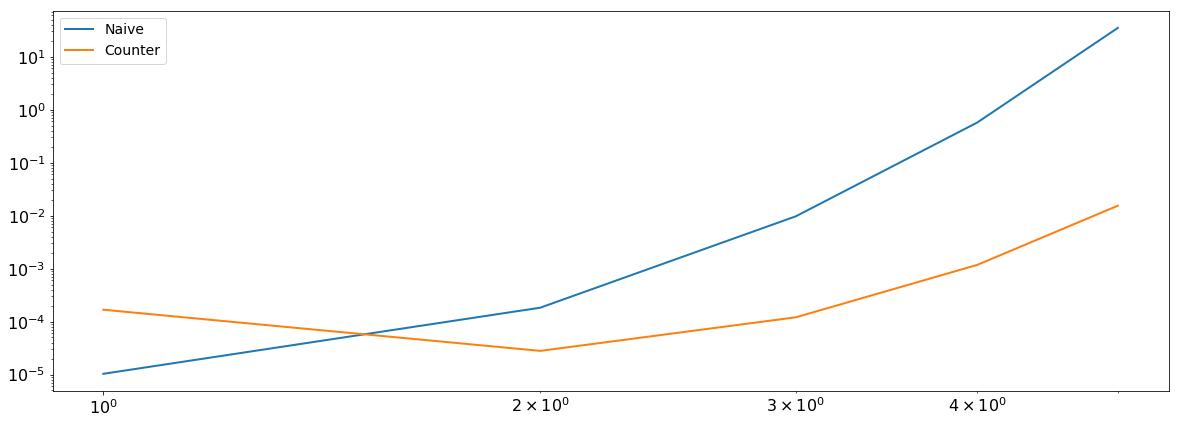

In [5]:
plot_runtimes('both')

In [11]:
def no_loop(x):
    return str(x)

In [12]:
%timeit l = [no_loop(x) for x in range(1000000)]

398 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit l = []
for x in range(1000000):
    l.append(no_loop(x))

516 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
def loop_inside(seq):
    return [str(x) for x in seq]

In [4]:
%timeit loop_inside(range(1000000))

299 ms ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


You have two lists as input.
You need to decide if they have any members in common.

In [16]:
# This solution *looks* simple and elegant, but what is its complexity?

import itertools

def have_collisions(a: list, b: list):
    for item_a, item_b in itertools.product(a, b):
        if item_a == item_b:
            True
    return False